In [1]:
#import modules
import matplotlib
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
import os
import random
import en_core_web_sm
import en_core_web_md
import string


The first step is to read each folder into a list. The following function does eactly that.

In [2]:
# This function takes as input a dir and return a list containing the text of all files
def read_data(directory):
    files=[]
    for file in os.listdir(directory):
        with open(directory + file, 'r', encoding='utf8') as f:  
            text = f.read()
            files.append(text)
    return files
    

In [98]:
# Just checking my current directory. Sometime os commands may fail due to not finding files/directories. This is due to being in the incorrect direcotry.
pwd
cd ../Riz_spam_filter/

'C:\\Users\\Rizwan Shafiq\\Documents\\DS\\ADS09\\Riz_spam_filter'

Lets create two lists called spam and ham

In [4]:
spam = read_data("enron1/enron1/spam/")
ham = read_data("enron1/enron1/ham/")

Check that it worked by printing 75 characters for 10 random records

In [131]:
import random

print("spam")
for i in range(5): 
    idx = random.choice(range(len(spam)))
    print(repr(spam[i][:75]))

print("ham")
for i in range(5): 
    idx = random.choice(range(len(ham)))
    print(repr(ham[i][:75]))


spam
'Subject: dobmeos with hgh my energy level has gone up! Stukm\nIntroducing\nDo'
'Subject: your prescription is ready.. Oxwq s f e\nLow cost prescription medi'
'Subject: get that new car 8434\nPeople nowthe weather or climate in any part'
'Subject: await your response\nDear partner,\nWe are a team of government offi'
'Subject: coca cola, mbna america, nascar partner with otcbb: imts\nStock\nPro'
ham
'Subject: christmas tree farm pictures\n'
'Subject: vastar resources, inc.\nGary, production from the high island large'
'Subject: calpine daily gas nomination\n- calpine daily gas nomination 1. Doc'
'Subject: re: issue\nFyI - see note below - already done.\nStella\n- - - - - - '
'Subject: meter 7268 nov allocation\nFyi.\n- - - - - - - - - - - - - - - - - -'


Here we confirm the length of each these lists that we created. They'll equal to the number of files in the folders ham and spam

In [132]:
print("Length of spam is {}".format(len(spam)))
print("Length of ham is {}".format(len(ham)))

Length of spam is 1500
Length of ham is 3672


Here we create one list that combines both lists and assigns 1 for spam and 0 for ham

In [8]:
# now lets create a single list and classify the messages into 1 for spam and 0 for ham
all_messages = [(ms, 1) for ms in spam] +\
                [(ms, 0) for ms in ham]

Loading Spacy's small pretrained statistical model for English

In [10]:
nlp = spacy.load('en_core_web_sm')

The next step is to split the text into individual words, This is called tokenisation. I'll use Spacy for this. Can equally use pythons NLTK or tfidfvectorizer that does this too. Below we create a fucntion that takes in a string and return the string after removing stopwords, changing to lower case and lemmetizing

In [134]:
punctuations = string.punctuation

def tokenizer(text):
    tokens = nlp(text)
    tokens = [tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_ for tok in tokens]
    tokens = [tok for tok in tokens if (tok not in stopwords and tok not in punctuations)]
    return (' '.join(tokens))



Lets run a small test

In [135]:
print(tokenizer('Hi, my Name is RiZwan and I am testing out Spacy.'))

hi rizwan test spacy


Now we'll create the X and y lists before splitting into training and test sets

In [136]:
X = [x for (x,y) in all_messages]



In [24]:
X_new = []
for i,x in enumerate(X):
    X_new.append(tokenizer(x))
    if i%100 ==  0:
        print(f"done {i/len(X)}")
    
y =  [y for (x,y) in all_messages]

done 0.0
done 0.019334880123743233
done 0.038669760247486466
done 0.058004640371229696
done 0.07733952049497293
done 0.09667440061871617
done 0.11600928074245939
done 0.13534416086620263
done 0.15467904098994587
done 0.1740139211136891
done 0.19334880123743234
done 0.21268368136117555
done 0.23201856148491878
done 0.251353441608662
done 0.27068832173240526
done 0.2900232018561485
done 0.30935808197989173
done 0.32869296210363497
done 0.3480278422273782
done 0.36736272235112144
done 0.3866976024748647
done 0.4060324825986079
done 0.4253673627223511
done 0.44470224284609433
done 0.46403712296983757
done 0.4833720030935808
done 0.502706883217324
done 0.5220417633410673
done 0.5413766434648105
done 0.5607115235885538
done 0.580046403712297
done 0.5993812838360402
done 0.6187161639597835
done 0.6380510440835266
done 0.6573859242072699
done 0.6767208043310131
done 0.6960556844547564
done 0.7153905645784996
done 0.7347254447022429
done 0.7540603248259861
done 0.7733952049497294
done 0.7927300

Next we'll create our training set and set aside a test set for evaluation of the model.
Using the stratify option as ours classes are imbalanced. i.e we have more ham than spam

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y,test_size=0.2, random_state=42,stratify=y)



In [137]:
#before tokenising
X[0]

'Subject: dobmeos with hgh my energy level has gone up! Stukm\nIntroducing\nDoctor - formulated\nHgh\nHuman growth hormone - also called hgh\nIs referred to in medical science as the master hormone. It is very plentiful\nWhen we are young, but near the age of twenty - one our bodies begin to produce\nLess of it. By the time we are forty nearly everyone is deficient in hgh,\nAnd at eighty our production has normally diminished at least 90 - 95%.\nAdvantages of hgh:\n- increased muscle strength\n- loss in body fat\n- increased bone density\n- lower blood pressure\n- quickens wound healing\n- reduces cellulite\n- improved vision\n- wrinkle disappearance\n- increased skin thickness texture\n- increased energy levels\n- improved sleep and emotional stability\n- improved memory and mental alertness\n- increased sexual potency\n- resistance to common illness\n- strengthened heart muscle\n- controlled cholesterol\n- controlled mood swings\n- new hair growth and color restore\nRead\nMore at thi

In [138]:
#after tokenising
X_new[0]

'subject dobmeo hgh energy level stukm introduce doctor formulate hgh human growth hormone hgh refer medical science master hormone plentiful young near age body begin produce time nearly deficient hgh eighty production normally diminish 90 95 advantage hgh increase muscle strength loss body fat increase bone density low blood pressure quickens wind heal reduce cellulite improve vision wrinkle disappearance increase skin thickness texture increase energy level improve sleep emotional stability improve memory mental alertness increase sexual potency resistance common illness strengthen heart muscle control cholesterol control mood swing new hair growth color restore read website unsubscribe'

now we need to do feature extraction and make the words into number that a ML algorith can understand. At the moment its all words and machinees like numbers.
Here we'll use the tdidf vectorisor.

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
print(X_train_tfidf.shape)



(4137, 41523)


The number of features for each of the 4137 rows has now increased to 40450 and we now have a sparse matrix.
Now lets build a basic naive bayes classfier as a baseline model

In [140]:

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train_tfidf, y_train)

# Here we need to apply the same tfidf vectorisation to X_test
X_test_tfidf = tfidf.transform(X_test)

# Apply the classifier to the test set 
predicted = clf.predict(X_test_tfidf)

for (text, pred, truth) in list(zip(X_test, predicted, y_test))[:10]:
    print("{} => predicted: {} -truth-: {}".format(text[:75], pred, truth))


subject fw 3 rd rev mar 2000 josey ranch nom fyi forward susan d trevino ho => predicted: 0 -truth-: 0
subject propose solution pat work volume management settlement vance bob cl => predicted: 0 -truth-: 0
subject wacog sale cannon winter 2000 01 accord contract pricing gas sell c => predicted: 0 -truth-: 0
subject las vegas read respond asap person budget 190 person different golf => predicted: 0 -truth-: 0
subject 10 gift image image image image image image image image image image => predicted: 0 -truth-: 0
subject thel 0 timebestsoftwareforyou shere sjustforfun teotihuacan sunblin => predicted: 0 -truth-: 1
subject neon bammel neon group fall 2001 doc => predicted: 0 -truth-: 0
subject revise spreadsheet new addition => predicted: 0 -truth-: 0
subject flexible physical nat gas product enrononline want head flexible ph => predicted: 0 -truth-: 0
subject hour teen porn video horny young slut rigid cock ass mouthe hot pla => predicted: 1 -truth-: 1


Looks pretty good.
Lets first create a pipeline for this so we can simplify the code and make it reproducible

In [141]:
from sklearn.pipeline import Pipeline
mnb_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB())
                    ])

mnb_clf.fit(X_train, y_train)
predicted = mnb_clf.predict(X_test)


Now lets evaluate performance using the confusion matrix and classfication report

In [142]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predicted))

[[733   2]
 [ 79 221]]


In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       735
           1       0.99      0.74      0.85       300

    accuracy                           0.92      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.92      0.92      1035



Lets try out some other classification algorithms and compare the results.
We can then visualise the accuracy and log loss

In [96]:

import pandas as pd
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models.append(('NB', Pipeline([('tfidf', TfidfVectorizer()),('clf', MultinomialNB())])))



classifiers = [
    ("KNN", Pipeline([('tfidf', TfidfVectorizer()),('clf', KNeighborsClassifier(3))])),
    ("SVC", Pipeline([('tfidf', TfidfVectorizer()),('clf', SVC(kernel="rbf", C=0.025, probability=True))])),
    ("DTC", Pipeline([('tfidf', TfidfVectorizer()),('clf', DecisionTreeClassifier())])),
    ("RF", Pipeline([('tfidf', TfidfVectorizer()),('clf', RandomForestClassifier())])),
    ("GB", Pipeline([('tfidf', TfidfVectorizer()),('clf', GradientBoostingClassifier())])),
    ("NB", Pipeline([('tfidf', TfidfVectorizer()),('clf', MultinomialNB())]))
    ]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for (name,clf) in classifiers:
    clf.fit(X_train, y_train)
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    
    print(confusion_matrix(y_test, train_predictions))
    print()
    print(classification_report(y_test, train_predictions))
    
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)



KNN
****Results****
[[726   9]
 [ 32 268]]

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       735
           1       0.97      0.89      0.93       300

    accuracy                           0.96      1035
   macro avg       0.96      0.94      0.95      1035
weighted avg       0.96      0.96      0.96      1035

Accuracy: 96.0386%
Log Loss: 0.3885514888423926
SVC
****Results****
[[735   0]
 [300   0]]

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       735
           1       0.00      0.00      0.00       300

    accuracy                           0.71      1035
   macro avg       0.36      0.50      0.42      1035
weighted avg       0.50      0.71      0.59      1035

Accuracy: 71.0145%
Log Loss: 0.12793098517308066
DTC
****Results****
[[702  33]
 [ 45 255]]

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       735
        

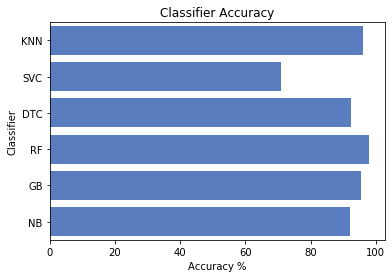

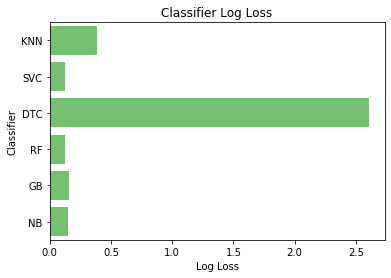

In [97]:
import seaborn as sns

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

All this is still without hypertuning